In [3]:
import pandas as pd
import numpy as np

In [4]:
crop = pd.read_csv("Crop_recommendation.csv")


In [12]:
crop.head(1000)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
995,33,23,45,20.002190,85.836182,7.116539,112.337046,pomegranate
996,4,14,41,19.851393,89.807323,6.430163,102.818636,pomegranate
997,13,17,45,21.254336,92.650589,7.159521,106.278467,pomegranate
998,39,24,39,23.653741,93.326575,6.431266,109.807618,pomegranate


In [16]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [18]:
crop.shape

(2200, 8)

In [20]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [22]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [24]:
crop.duplicated().sum()


0

In [26]:
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [28]:
non_numeric_columns = crop.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['label'], dtype='object')


In [30]:
# Example: Convert categorical data to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

for col in non_numeric_columns:
    crop[col] = LabelEncoder().fit_transform(crop[col])

In [31]:
crop_numeric = crop.drop(columns=non_numeric_columns)
correlation_matrix = crop_numeric.corr()
print(correlation_matrix)


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


<Axes: >

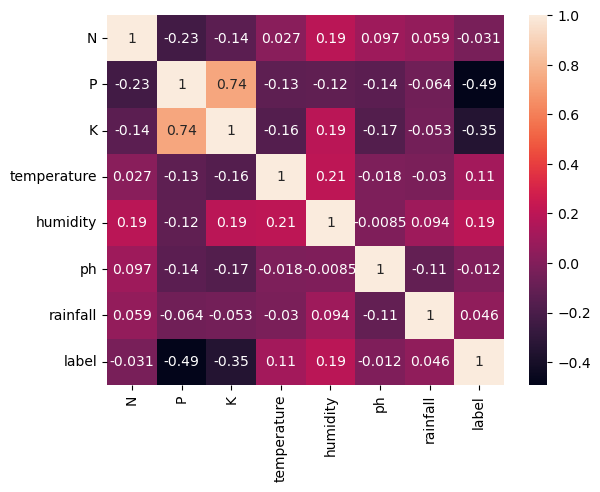

In [32]:
import seaborn as sns
sns.heatmap(crop.corr(), annot=True, cbar=True)

In [36]:
crop.label.value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [38]:
crop['label'].unique().size


22

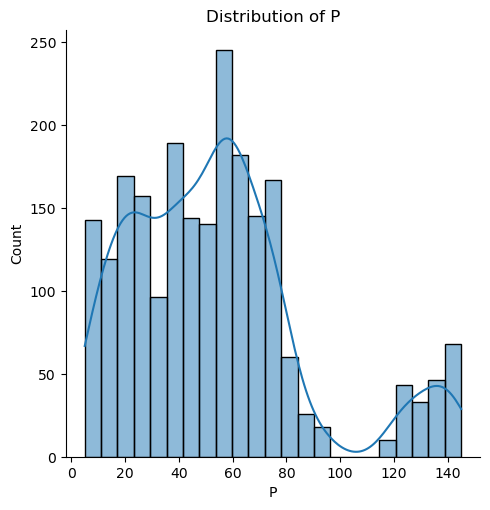

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated code using displot
sns.displot(crop['P'], kde=True)
plt.title('Distribution of P')
plt.show()

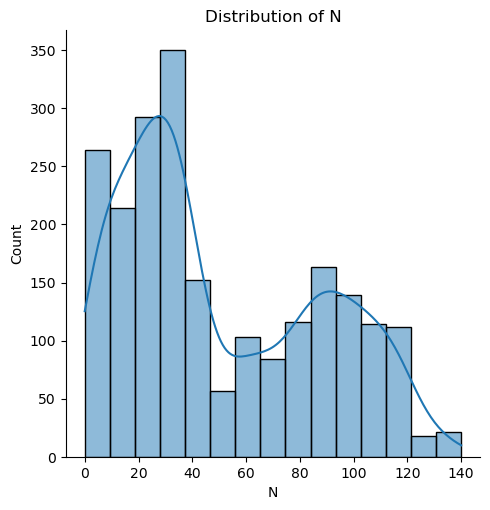

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated code using displot
sns.displot(crop['N'], kde=True)
plt.title('Distribution of N')
plt.show()


In [44]:
crop.label.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [46]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [48]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,NaN


In [50]:
crop.label.unique()

array([nan])

In [52]:
crop.label.value_counts()

Series([], Name: count, dtype: int64)

In [54]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [56]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [58]:
y.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: label, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [61]:
X_train.shape

(1760, 7)

In [62]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [63]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [71]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [89]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [108]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [110]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,NaN


In [116]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv("Crop_recommendation.csv")

In [130]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


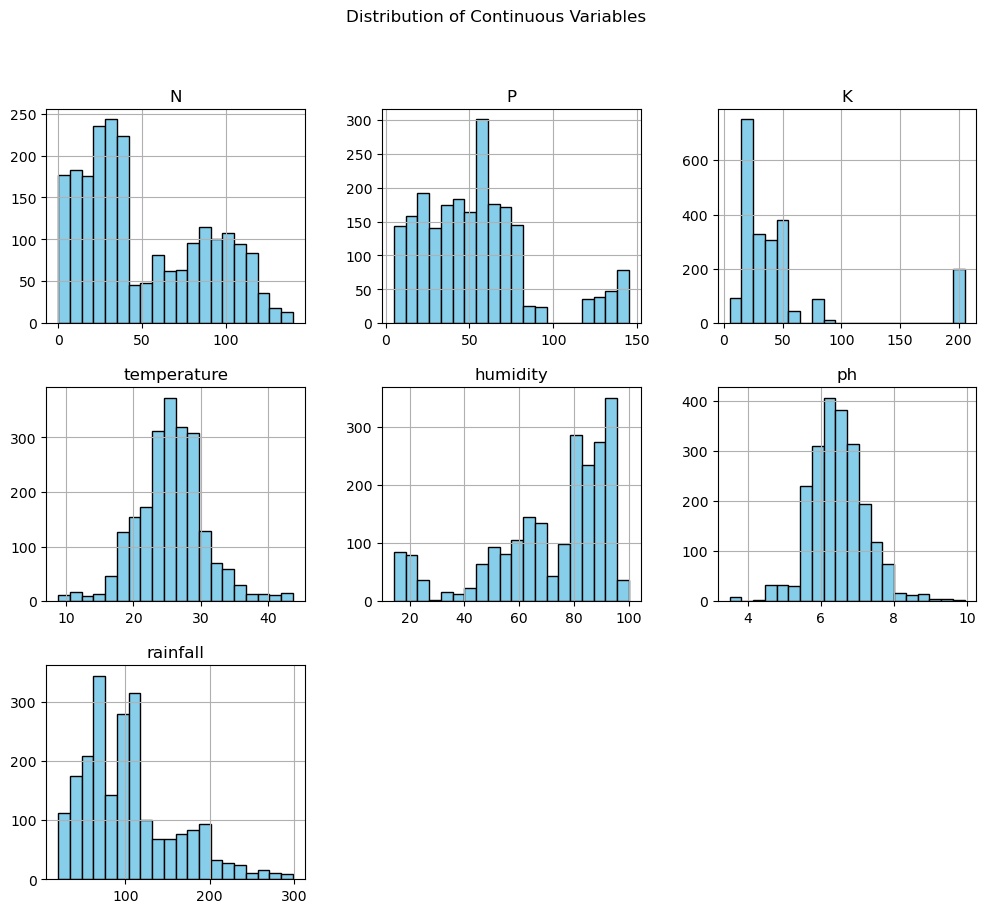

In [132]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Continuous Variables")
plt.show()

C:\Users\cjaga\AppData\Local\Temp\ipykernel_9048\980237259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


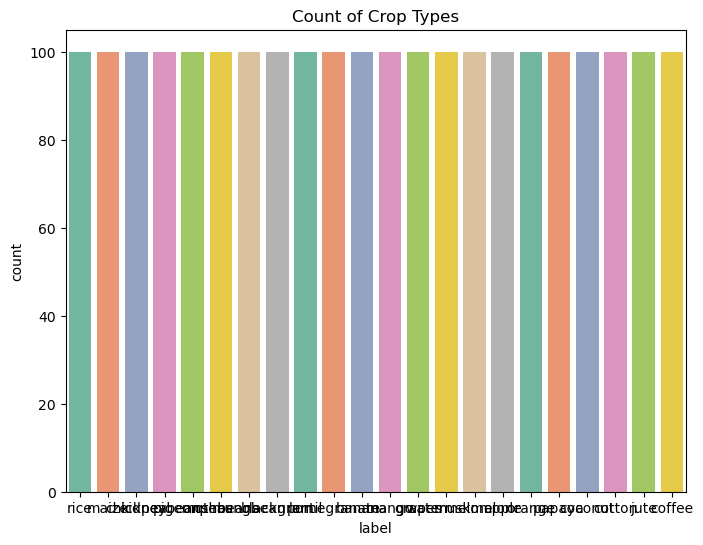

In [134]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Count of Crop Types")
plt.show()


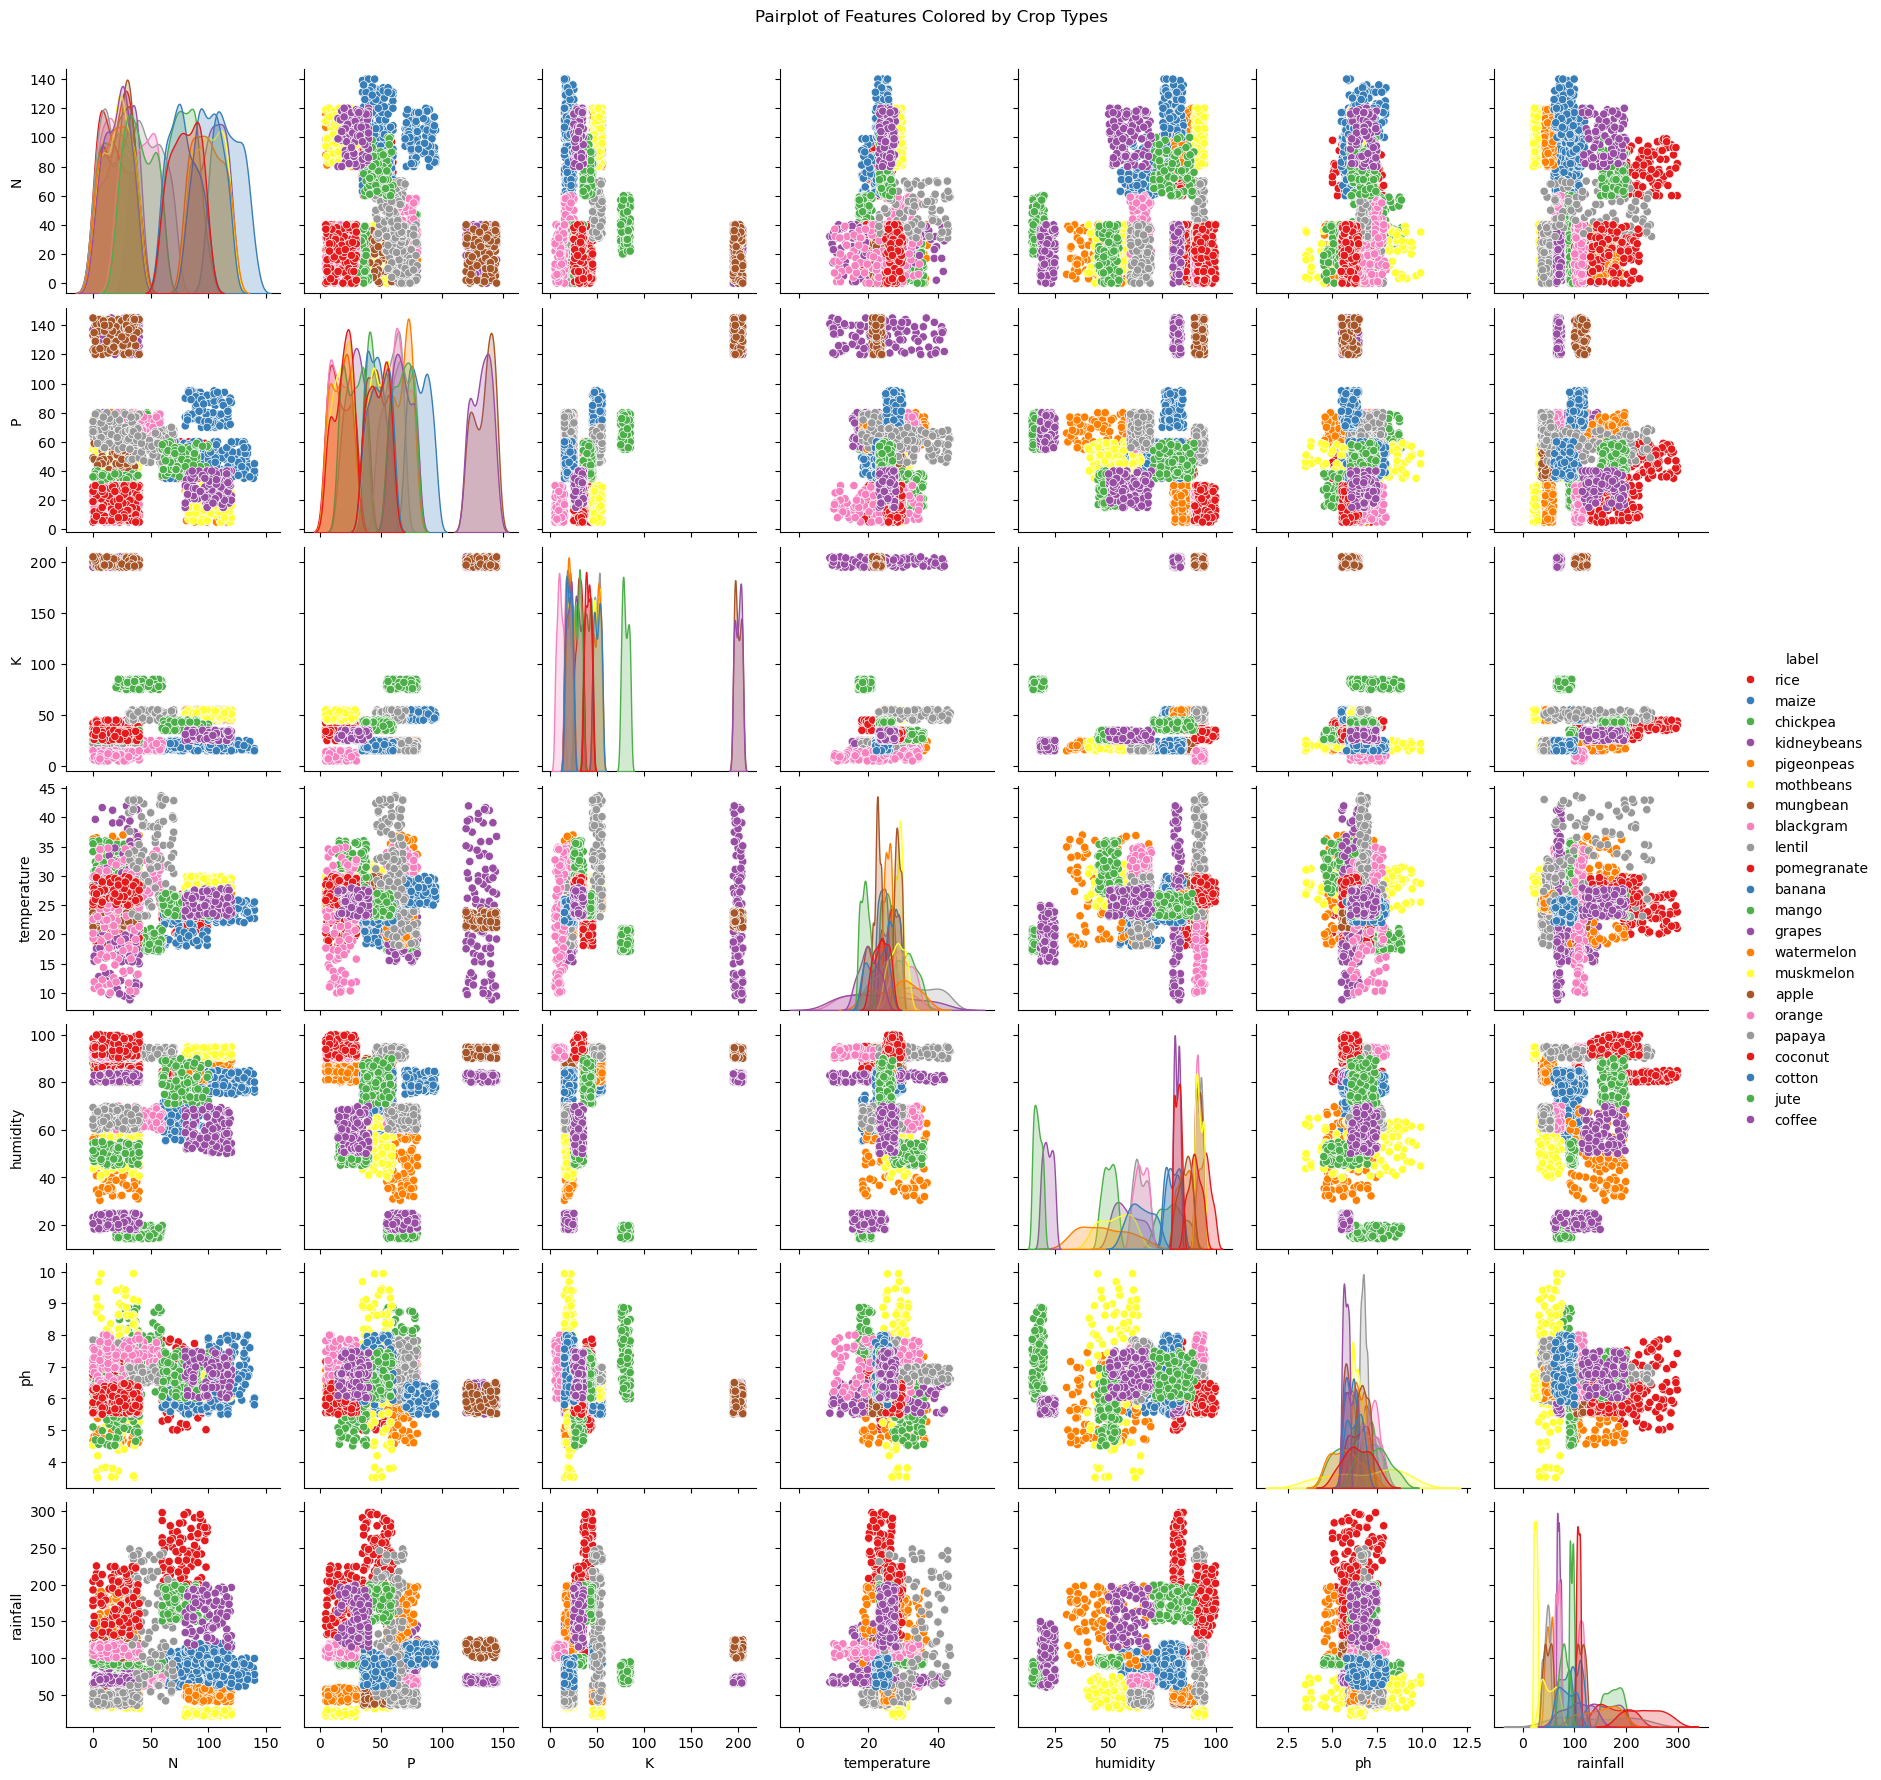

In [136]:
sns.pairplot(df, hue='label', diag_kind='kde', palette='Set1')
plt.suptitle("Pairplot of Features Colored by Crop Types", y=1.02)
plt.show()


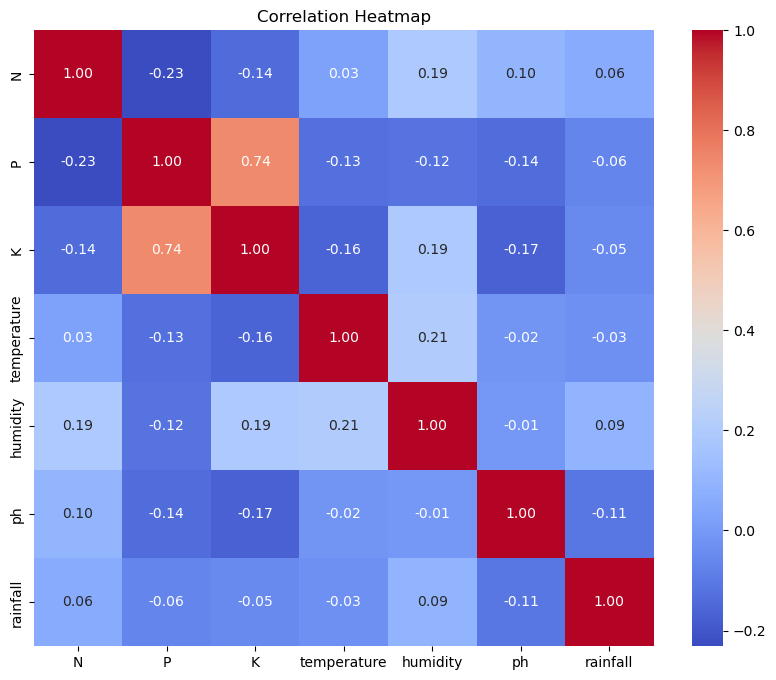

In [142]:
# Exclude the 'label' column before calculating the correlation
plt.figure(figsize=(10, 8))

# Select only numerical columns (exclude 'label')
df_numerical = df.drop(columns=['label'])

# Plot heatmap of the correlation matrix of the numerical columns
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()


C:\Users\cjaga\AppData\Local\Temp\ipykernel_9048\1871684718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='temperature', data=df, palette='Set3')


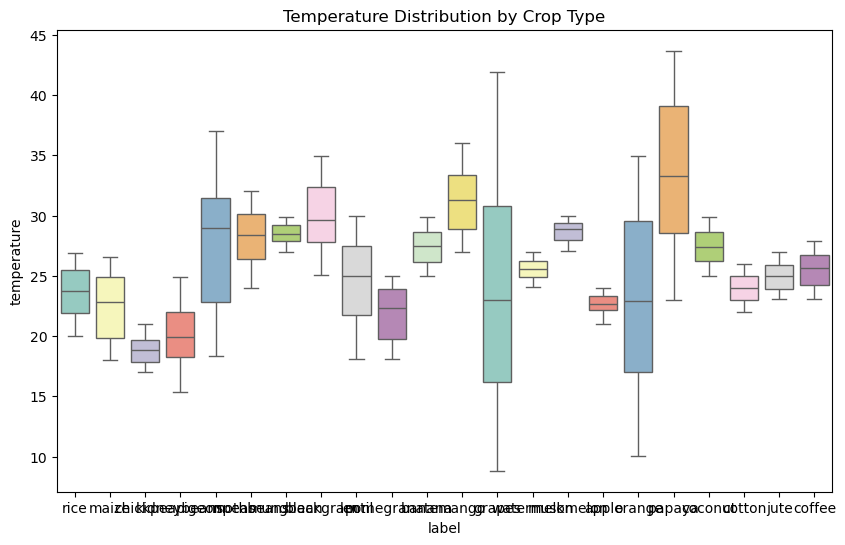

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='temperature', data=df, palette='Set3')
plt.title("Temperature Distribution by Crop Type")
plt.show()


C:\Users\cjaga\AppData\Local\Temp\ipykernel_9048\2994662857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='ph', data=df, palette='Pastel1')


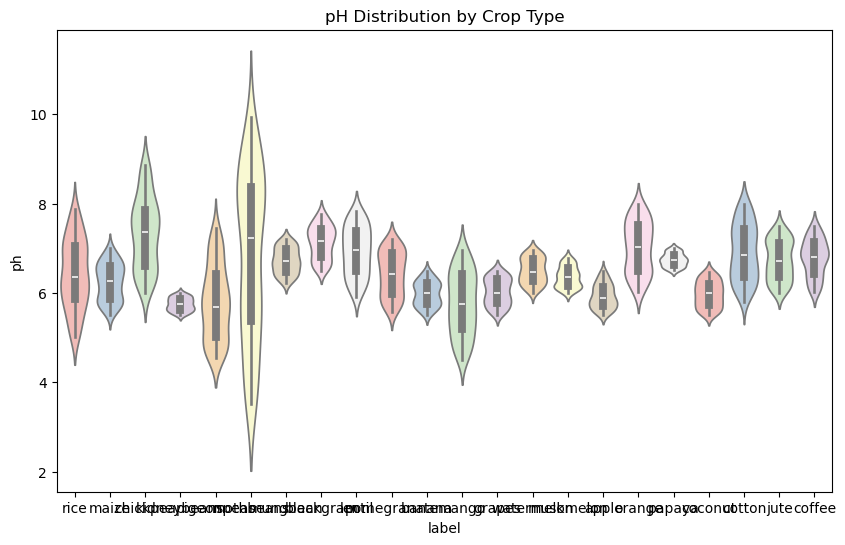

In [146]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='ph', data=df, palette='Pastel1')
plt.title("pH Distribution by Crop Type")
plt.show()


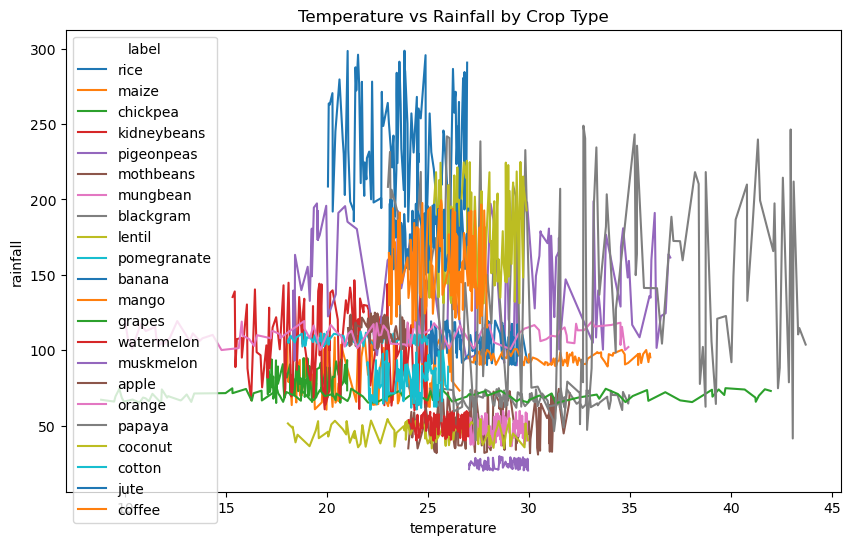

In [148]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='temperature', y='rainfall', hue='label', data=df, palette='tab10')
plt.title("Temperature vs Rainfall by Crop Type")
plt.show()


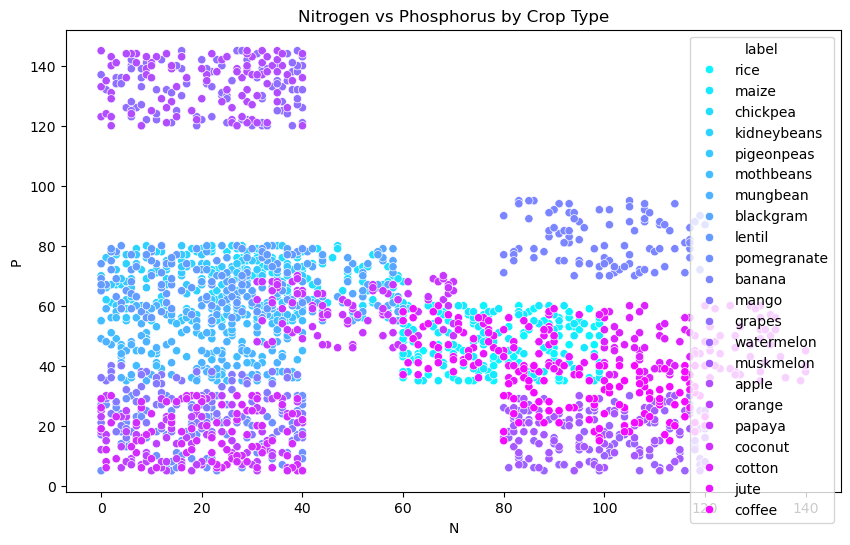

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='N', y='P', hue='label', data=df, palette='cool')
plt.title("Nitrogen vs Phosphorus by Crop Type")
plt.show()


In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [154]:
df = pd.read_csv("Crop_recommendation.csv")

In [156]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [158]:
# Convert categorical labels to numerical values using LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [160]:
# Split features (X) and labels (y)
X = df.drop(columns=['label'])
y = df['label']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [162]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)


In [164]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")

# Classification report for more details
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


KNN Model Accuracy: 97.12%
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      0.97      0.98        30
      cotton       0.93      0.96      0.95        28
      grapes       1.00      1.00      1.00        23
        jute       0.78      0.91      0.84        34
 kidneybeans       0.97      1.00      0.99        36
      lentil       0.92      1.00      0.96        22
       maize       0.96      0.92      0.94        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [168]:
df = pd.read_csv("Crop_recommendation.csv")

In [170]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [172]:
# Split features (X) and labels (y)
X = df.drop(columns=['label'])
y = df['label']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [174]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

In [176]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")

# Classification report for more details
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Random Forest Model Accuracy: 99.09%
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [180]:
df = pd.read_csv("Crop_recommendation.csv")

In [182]:
# Define features and target
X = df.drop(columns=['rainfall', 'label'])  # Features
y = df['rainfall']  # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [184]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)


In [186]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 2840.96
R-squared: 0.01


In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [192]:
df = pd.read_csv("Crop_recommendation.csv")

In [194]:

# Convert categorical labels to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [196]:
# Define features (X) and target (y)
X = df.drop(columns=['label'])
y = df['label']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [198]:
# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)


In [200]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}%")

# Classification report for more details
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Decision Tree Model Accuracy: 98.64%
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.94      0.90        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.

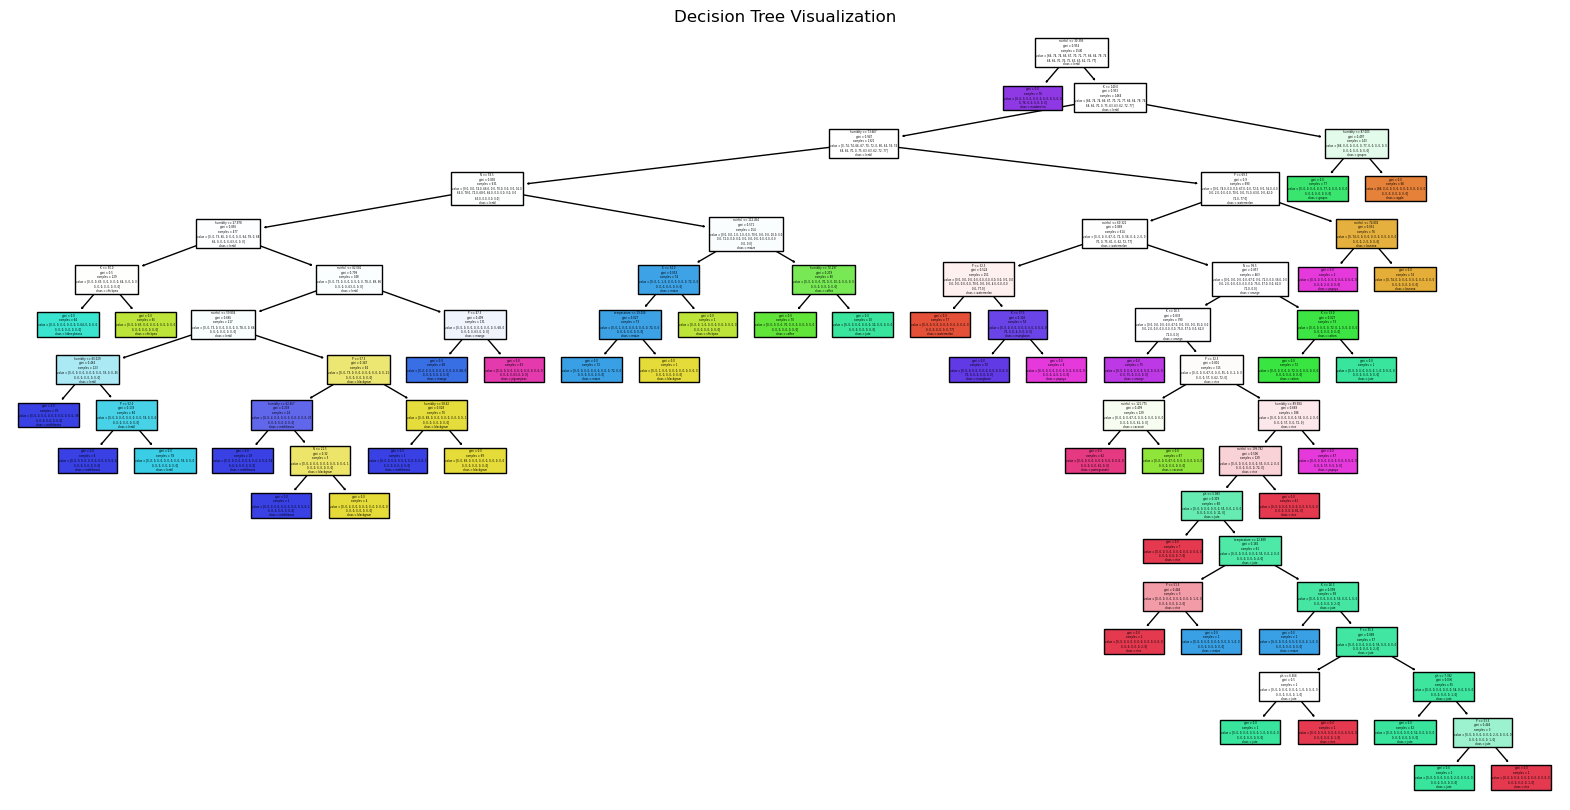

In [202]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.title("Decision Tree Visualization")
plt.show()
